In [1]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

In [2]:
# load the model from the file
model = load_model('model.h5')

In [3]:
pre_dict = {0: 'dodo', 1: 'indomie', 2: 'jollof', 3: 'puff_puff', 4: 'suya', 5: 'unknown'}

In [4]:
test_dir = 'data/test'
predictions = []
images = []
true_output = []
for i in os.listdir(test_dir):
    img_path = os.path.join(test_dir, i)
    img = load_img(img_path, target_size=(224, 224))
    # convert the image to a NumPy array and rescale to values between 0 and 1
    img = img_to_array(img) / 255.0
    images.append(img)
    for key, value in pre_dict.items():
        if value in img_path:
            true_output.append(value)
    # add a batch dimension to the array
    predict_img = tf.expand_dims(img, axis=0)
    
    predictions.append(model.predict(predict_img, verbose=0))

Image 1
Prediction: dodo  |  Actual: dodo


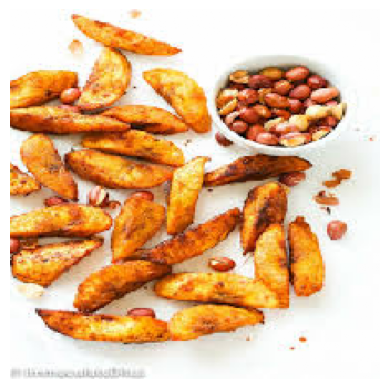

Image 2
Prediction: unknown  |  Actual: dodo


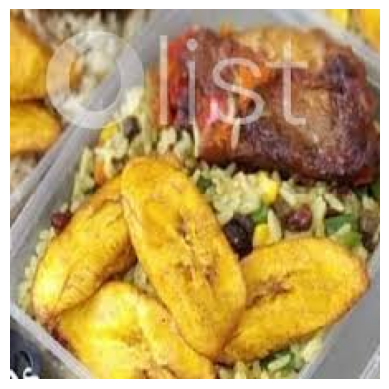

Image 3
Prediction: dodo  |  Actual: dodo


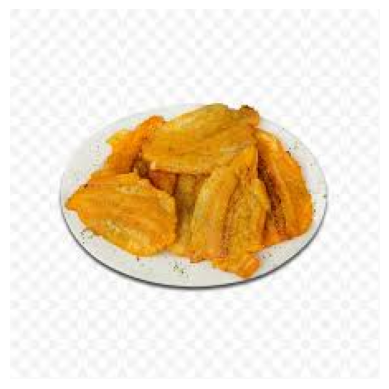

Image 4
Prediction: dodo  |  Actual: dodo


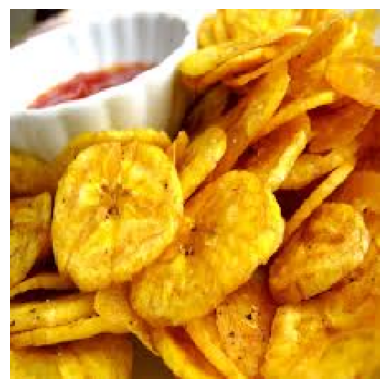

Image 5
Prediction: indomie  |  Actual: indomie


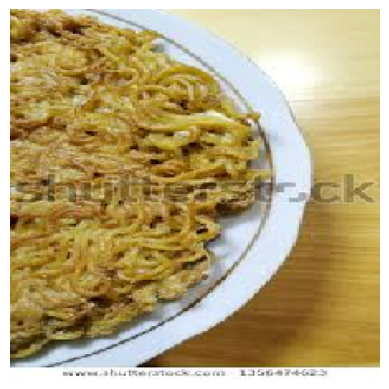

Image 6
Prediction: indomie  |  Actual: indomie


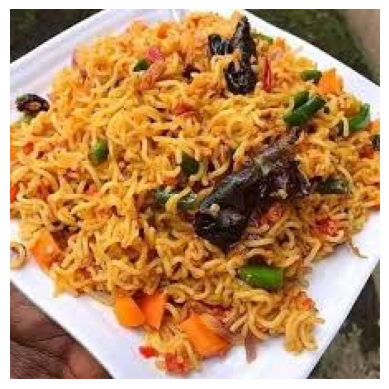

Image 7
Prediction: indomie  |  Actual: indomie


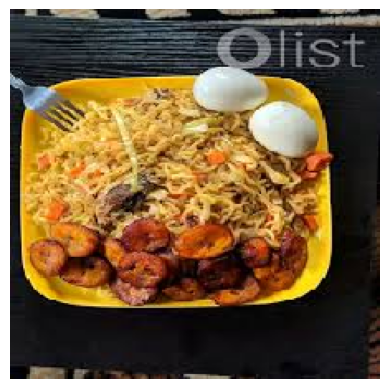

Image 8
Prediction: indomie  |  Actual: indomie


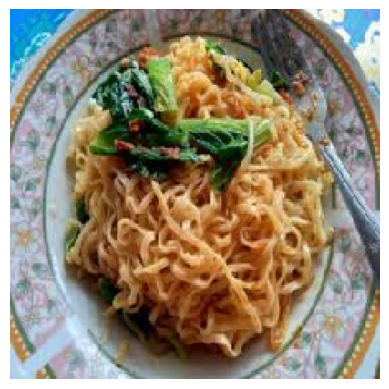

Image 9
Prediction: indomie  |  Actual: indomie


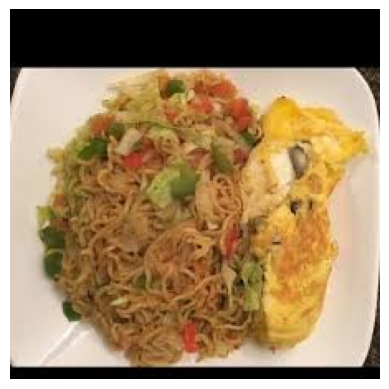

Image 10
Prediction: indomie  |  Actual: indomie


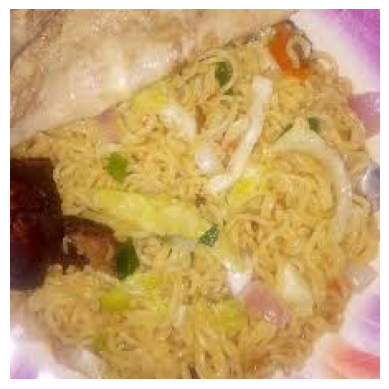

Image 11
Prediction: indomie  |  Actual: indomie


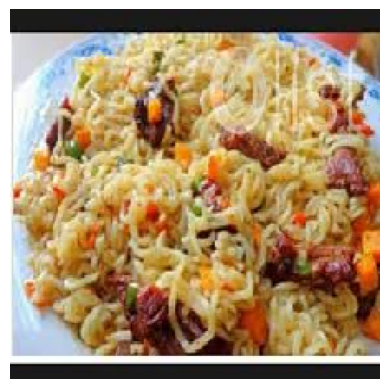

Image 12
Prediction: indomie  |  Actual: indomie


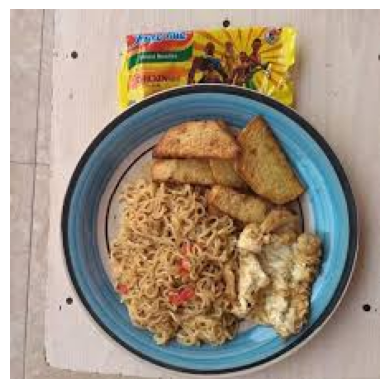

Image 13
Prediction: indomie  |  Actual: indomie


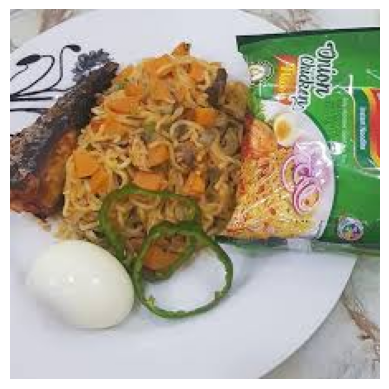

Image 14
Prediction: indomie  |  Actual: indomie


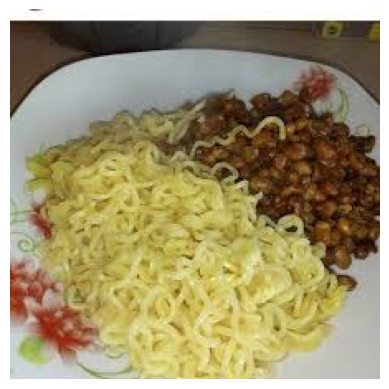

Image 15
Prediction: jollof  |  Actual: jollof


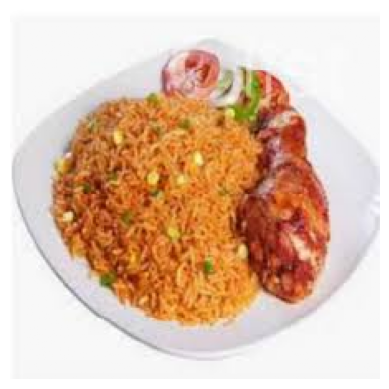

Image 16
Prediction: jollof  |  Actual: jollof


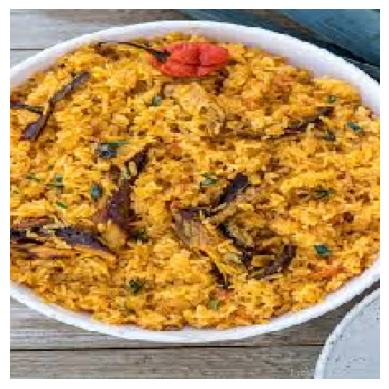

Image 17
Prediction: puff_puff  |  Actual: jollof


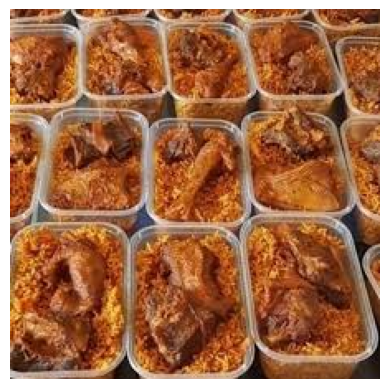

Image 18
Prediction: jollof  |  Actual: jollof


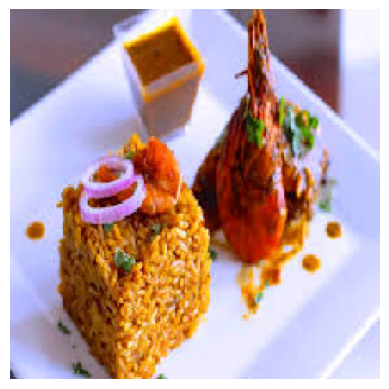

Image 19
Prediction: puff_puff  |  Actual: puff_puff


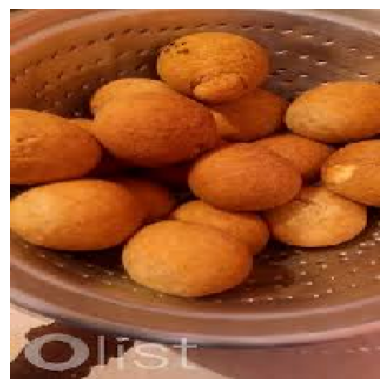

Image 20
Prediction: puff_puff  |  Actual: puff_puff


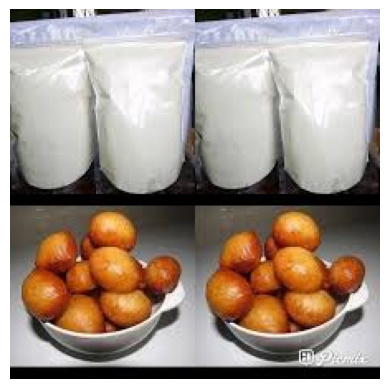

Image 21
Prediction: puff_puff  |  Actual: puff_puff


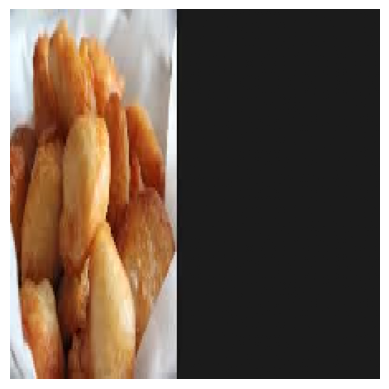

Image 22
Prediction: puff_puff  |  Actual: puff_puff


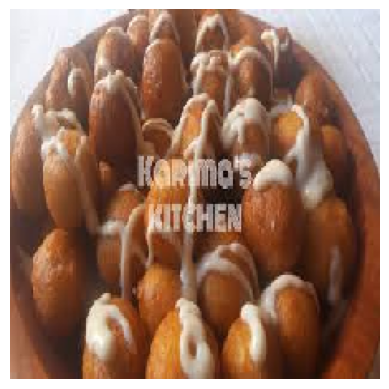

Image 23
Prediction: suya  |  Actual: suya


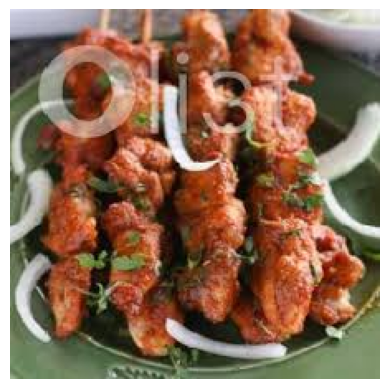

Image 24
Prediction: unknown  |  Actual: suya


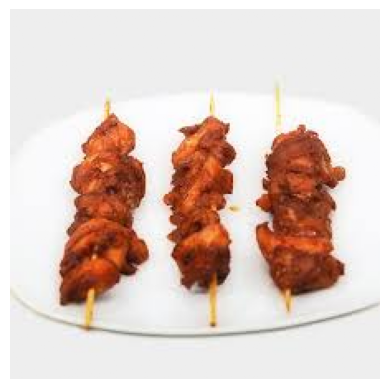

Image 25
Prediction: suya  |  Actual: suya


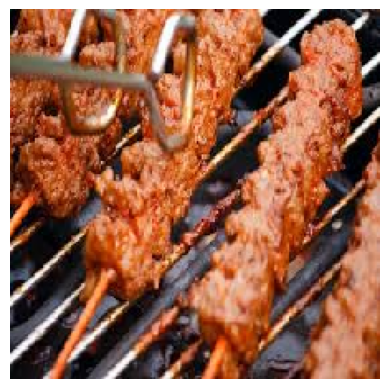

Image 26
Prediction: unknown  |  Actual: suya


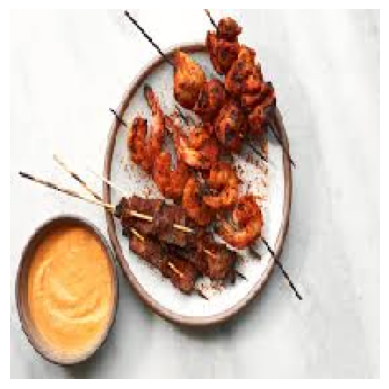

Image 27
Prediction: unknown  |  Actual: unknown


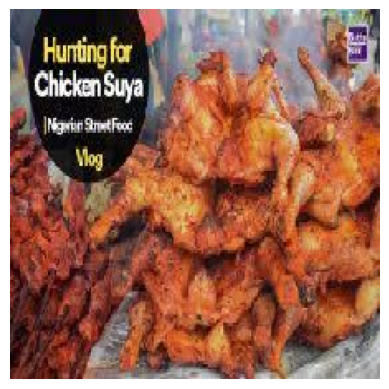

In [5]:
acc = 0
for i in range(len(predictions)):
    index = [index for index, x in enumerate(predictions[i]) if x > 0.5]
    try:
        index = index[0]
    except IndexError:
        index = 5
    if pre_dict[index] == true_output[i]:
        acc += 1
    print(f'Image {i+1}')
    print(f'Prediction: {pre_dict[index]}  |  Actual: {true_output[i]}')
    plt.imshow(images[i])
    plt.axis('off')
    plt.show()

In [6]:
print("Accuracy: {:.2f}%".format(acc/len(predictions)*100))

Accuracy: 85.19%
